## main

In [1]:
from Registration_2D import *
from Utils import *
# import cv2
import cv2

In [2]:
# %run Registration_2D.py --fixed ./data/OAS1_0002_MR1/brain.nii.gz --moving ./data/OAS1_0001_MR1/brain.nii.gz

In [3]:
parser = argparse.ArgumentParser()

kernel = parser.add_argument("--smoothing_kernel", type=str,
                    dest="smoothing_kernel", default='AK',
                    help="AK: Averaging kernel; GK: Gaussian Kernel")

weight_J_det = parser.add_argument("--lambda_J", type=int,
                    dest="lambda_J", default=2.5,
                    help="Loss weight for neg J")

weight_df = parser.add_argument("--lambda_df", type=int,
                    dest="lambda_df", default=0.05,
                    help="Loss weight for dphi/dx")
weight_v = parser.add_argument("--lambda_v", type=int,
                    dest="lambda_v", default=0.00005,
                    help="Loss weight for neg J")
weight_ncc = parser.add_argument("--lambda_NCC", type=float,
                        dest="lambda_NCC", default=1,
                        help="Loss weight for NCC")

# weight_df = parser.add_argument("--lambda_df", type=int,
#                     dest="lambda_df", default=0.05,
#                     help="Loss weight for dphi/dx")
# weight_v = parser.add_argument("--lambda_v", type=int,
#                     dest="lambda_v", default=0.00005,
#                     help="Loss weight for neg J")



parser.add_argument("--fixed", type=str,
                    dest="fixed", default="./data/OASIS_OAS1_0001_MR1/aligned_norm.nii.gz",
                    help="fixed image segmentation data path")

parser.add_argument("--moving", type=str,
                    dest="moving", default="./data/OASIS_OAS1_0002_MR1/aligned_norm.nii.gz",
                    help="moving image segmentation data path")

parser.add_argument("--fixed_seg", type=str,
                    dest="fixed_seg", default="./data/OASIS_OAS1_0001_MR1/aligned_seg35.nii.gz",
                    help="fixed image segmentation data path")

parser.add_argument("--moving_seg", type=str,
                    dest="moving_seg", default="./data/OASIS_OAS1_0002_MR1/aligned_seg35.nii.gz",
                    help="moving image segmentation data path")


# File path
parser.add_argument("--savepath", type=str,
                    dest="savepath", default='./result_2D',
                    help="path for saving results")
# parser.add_argument("--fixed", type=str,
#                     dest="fixed", default='./data/OAS1_0001_MR1/brain.nii.gz',
#                     help="fixed image data path")
# parser.add_argument("--moving", type=str,
#                     dest="moving", default='./data/OAS1_0002_MR1/brain.nii.gz',
#                     help="moving image data path")
# parser.add_argument("--fixed_seg", type=str,
#                     dest="fixed_seg", default='./data/OAS1_0001_MR1/brain_aseg.nii.gz',
#                     help="fixed image segmentation data path")
# parser.add_argument("--moving_seg", type=str,
#                     dest="moving_seg", default='./data/OAS1_0002_MR1/brain_aseg.nii.gz',
#                     help="moving image segmentation data path")
# Model configuration
parser.add_argument("--ds", type=int,
                    dest="ds", default=2,
                    help="specify output downsample times.")
parser.add_argument("--bs", type=int,
                    dest="bs", default=16,
                    help="bottleneck size.")

parser.add_argument("--smoothing_win", type=int,
                    dest="smoothing_win", default=13,
                    help="Smoothing Kernel size")
parser.add_argument("--smoothing_pass", type=int,
                    dest="smoothing_pass", default=1,
                    help="Number of Smoothing pass")
# Training configuration
parser.add_argument("--time_steps", type=int,
                    dest="time_steps", default=2,
                    help="number of time steps between the two images, >=2.")
parser.add_argument("--optimizer", type=str,
                    dest="optimizer", default='Euler',
                    help="Euler or RK.")
parser.add_argument("--STEP_SIZE", type=float,
                    dest="STEP_SIZE", default=0.001,
                    help="step size for numerical integration.")
parser.add_argument("--epoches", type=int,
                    dest="epoches", default=200,
                    help="No. of epochs to train.")
parser.add_argument("--NCC_win", type=int,
                    dest="NCC_win", default=10,
                    help="NCC window size")
parser.add_argument("--lr", type=float,
                    dest="lr", default=0.005,
                    help="Learning rate.")


parser.add_argument("--loss_sim", type=str,
                    dest="loss_sim", default='NCC',
                    help="Similarity measurement")
# Debug
parser.add_argument("--debug", type=bool,
                    dest="debug", default=False,
                    help="debug mode")
# Device
parser.add_argument("--device", type=str,
                    dest="device", default='cuda:0',
                    help="gpu: cuda:0; cpu: cpu")
config = parser.parse_args("")



In [4]:
"./data/OASIS_OAS1_0001_MR1/aligned_seg35.nii.gz"
"./data/OASIS_OAS1_0001_MR1/aligned_norm.nii.gz"

moving = load_nii("./data/OAS1_0001_MR1/brain.nii.gz")
fixed = load_nii("./data/OAS1_0002_MR1/brain.nii.gz")
moving_img = moving[:,:,50].T
fixed_img = fixed[:,:,50].T

Text(0.5, 1.0, 'J')

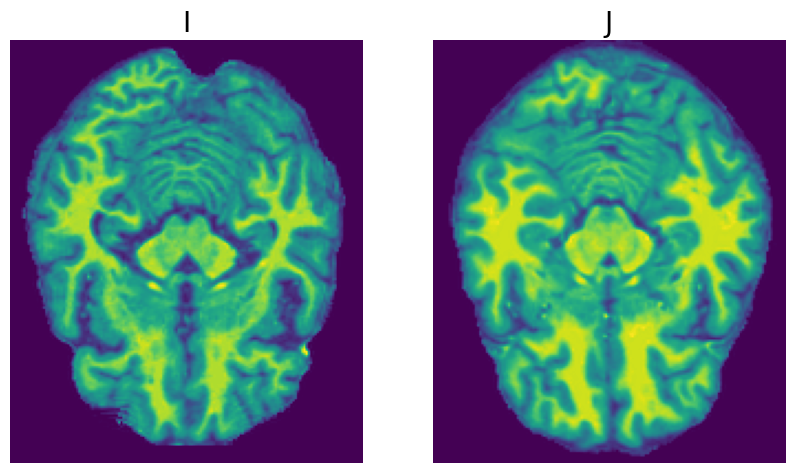

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(moving_img)
ax[0].axis('off')
# title I
ax[0].set_title('I', fontsize=20)
ax[1].imshow(fixed_img)
ax[1].axis('off')
ax[1].set_title('J', fontsize=20)

In [6]:
device = torch.device(config.device)
best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)

(192, 160)


c:\Users\blacksilver\.conda\envs\paper_reproduce\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\blacksilver\.conda\envs\paper_reproduce\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Iteration: 10 Loss_sim: -2.895e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: -4.068e-01 loss_J: 2.744e-03
Iteration: 30 Loss_sim: -4.570e-01 loss_J: 1.781e-03
Iteration: 40 Loss_sim: -4.880e-01 loss_J: 7.610e-03
Iteration: 50 Loss_sim: -5.065e-01 loss_J: 6.248e-03
Iteration: 60 Loss_sim: -5.145e-01 loss_J: 3.007e-03
Iteration: 70 Loss_sim: -5.279e-01 loss_J: 6.142e-03
Iteration: 80 Loss_sim: -5.240e-01 loss_J: 2.130e-03
Iteration: 90 Loss_sim: -5.447e-01 loss_J: 4.866e-03
Iteration: 100 Loss_sim: -5.522e-01 loss_J: 5.758e-03
Iteration: 110 Loss_sim: -5.460e-01 loss_J: 3.073e-03
Iteration: 120 Loss_sim: -5.547e-01 loss_J: 3.749e-03
Iteration: 130 Loss_sim: -5.647e-01 loss_J: 7.861e-03
Iteration: 140 Loss_sim: -5.673e-01 loss_J: 5.022e-03
Iteration: 150 Loss_sim: -5.658e-01 loss_J: 3.953e-03
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best epoch:  158

In [7]:
# import results
# warped = load_nii('./result_2D/warped.nii.gz')

In [8]:
# best_df to numpy
best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()


# f = lambda x,y : ( x+0.8*np.exp(-x**2-y**2),y )

# fig, ax = plt.subplots()

# # grid_x,grid_y = np.meshgrid(np.linspace(0,200,100),np.linspace(0,200,100))
# grid_x,grid_y = np.meshgrid(np.linspace(-3,3,200),np.linspace(-3,3,200))
# plot_grid(grid_x,grid_y, ax=ax,  color="lightgrey")

# distx, disty = f(grid_x,grid_y)
# plot_grid(best_df[0,1,:,:], best_df[0,0,:,:], ax=ax, color="C0")

# plt.show()

In [10]:
best_warped_moving.shape

(192, 160)

## Condition A both K and LJdet

In [11]:
def plot_df(best_df_with_grid,is_plot_neg = True, is_plot_grid = True, is_plot_jet = True, resize_factor = 0.3):
    num_plot = is_plot_neg + is_plot_grid + is_plot_jet+1
    fig, axes = plt.subplots(1, num_plot, figsize=(5*num_plot, 5))
    plot_curr = 0
    axes[plot_curr].imshow(best_warped_moving)
    # title warped
    axes[plot_curr].set_title('warped image', fontsize=10)
    axes[plot_curr].axis('off')
    plot_curr += 1
    if is_plot_grid:
        img0 = best_df_with_grid[0,:,:,0]
        img1 = best_df_with_grid[0,:,:,1]
        # resize img0 and img1
        # resize to a smaller size
        img0 = cv2.resize(img0, (int(img0.shape[0]*resize_factor), int(img0.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
        img1 = cv2.resize(img1, (int(img1.shape[0]*resize_factor), int(img1.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
        # plot_grid(best_df_with_grid[0,:,:,1], best_df_with_grid[0,:,:,0], ax=ax, color="C0")
        plot_grid(img1, img0, color="C0", ax = axes[plot_curr])
        # axis off
        axes[plot_curr].axis('off')
        # title
        axes[plot_curr].set_title('grid visualization of the deformation field', fontsize=10)  
        plot_curr += 1
        
    if is_plot_jet:
        J_det = JacboianDet_2D(best_df_with_grid)
        axes[plot_curr].imshow(J_det[0,:,:])
        # axis off
        axes[plot_curr].axis('off')
        # title
        axes[plot_curr].set_title('Jacobian Determinant', fontsize=10)  
        plot_curr += 1
    if is_plot_neg:
        J_neg = -torch.clip(J_det, max=0, min=-1e-10)*1e10
        # convert to numpy
        # J_neg = -1.0 * (J_det - 0.01)
        # J_neg = torch.clip(J_neg, min=0)
        J_neg = J_neg.detach().cpu().numpy()
        axes[plot_curr].imshow(J_neg[0,:,:])
        # axis off
        axes[plot_curr].axis('off')
        # title
        axes[plot_curr].set_title('Negative Jacobian Determinant', fontsize=10)  
        plot_curr += 1
    plt.show()

In [12]:
# relu to best_df
J_det = JacboianDet_2D(best_df_with_grid)
# test_df = torch.relu(best_df)
J_det

tensor([[[0.9265, 0.9771, 0.9836,  ..., 1.2197, 1.2130, 1.1624],
         [0.9807, 1.0079, 0.9980,  ..., 1.1498, 1.1558, 1.1205],
         [1.0249, 1.0258, 1.0005,  ..., 1.0974, 1.1181, 1.1011],
         ...,
         [0.9869, 1.0574, 1.0856,  ..., 1.2185, 1.2462, 1.2287],
         [0.9523, 1.0408, 1.0879,  ..., 1.1840, 1.2206, 1.2159],
         [0.9242, 1.0311, 1.1017,  ..., 1.1237, 1.1621, 1.1644]]])

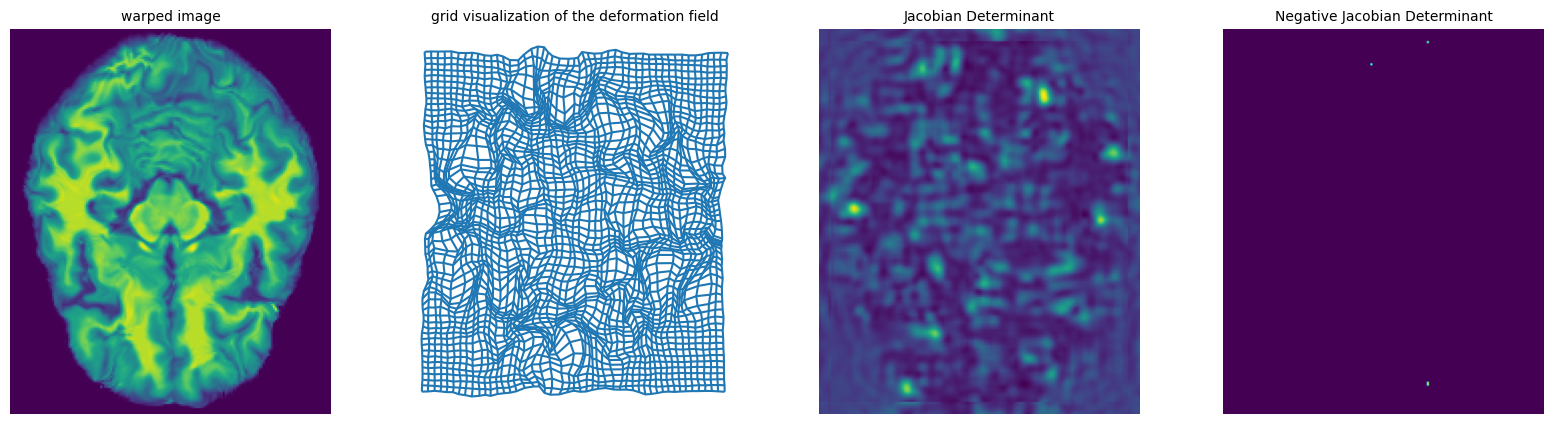

In [13]:
plot_df(best_df_with_grid)

## Condition only L

In [14]:
_kernel = kernel.default
kernel.default = "nothing"
# _weight_ncc = weight_ncc.default
# weight_ncc.default = 0.
config = parser.parse_args("")

best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)
# weight_ncc.default = _weight_ncc
kernel.default = _kernel

(192, 160)
Iteration: 10 Loss_sim: -2.432e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: -2.447e-01 loss_J: 0.000e+00
Iteration: 30 Loss_sim: -3.392e-01 loss_J: 5.040e-05
Iteration: 40 Loss_sim: -4.431e-01 loss_J: 2.119e-03
Iteration: 50 Loss_sim: -4.807e-01 loss_J: 1.708e-03
Iteration: 60 Loss_sim: -5.142e-01 loss_J: 3.187e-03
Iteration: 70 Loss_sim: -5.384e-01 loss_J: 6.784e-03
Iteration: 80 Loss_sim: -5.472e-01 loss_J: 5.063e-03
Iteration: 90 Loss_sim: -5.592e-01 loss_J: 5.951e-03
Iteration: 100 Loss_sim: -5.642e-01 loss_J: 4.903e-03
Iteration: 110 Loss_sim: -5.705e-01 loss_J: 5.999e-03
Iteration: 120 Loss_sim: -5.670e-01 loss_J: 3.675e-03
Iteration: 130 Loss_sim: -5.784e-01 loss_J: 7.135e-03
Iteration: 140 Loss_sim: -5.759e-01 loss_J: 4.242e-03
Iteration: 150 Loss_sim: -5.835e-01 loss_J: 7.363e-03
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best 

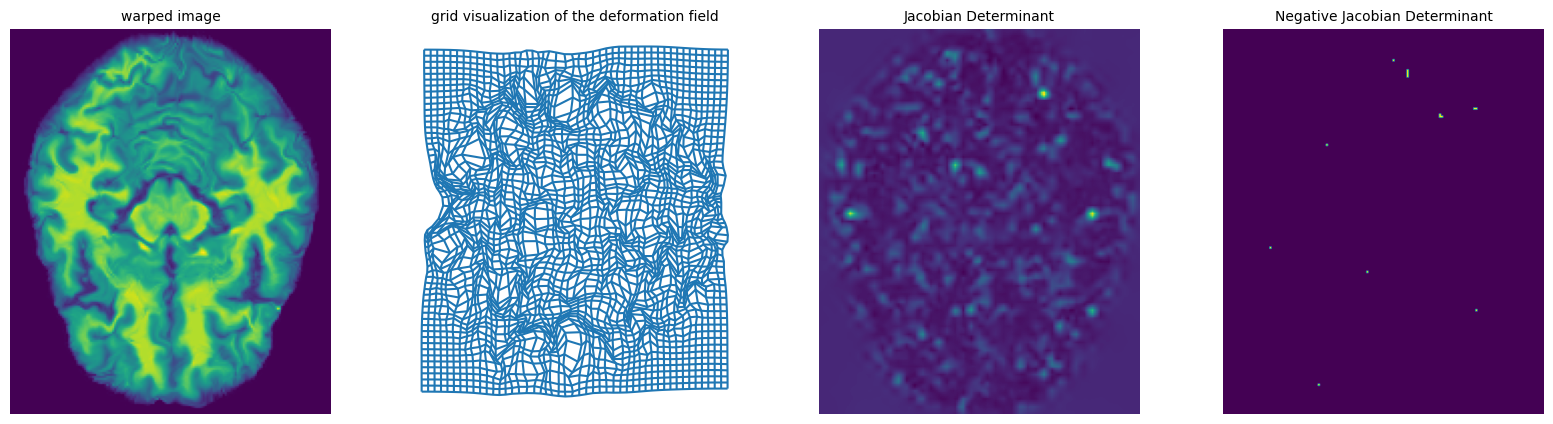

In [15]:
# plot for the best df with grid
best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)

plot_df(best_df_with_grid)

## Condition only K

In [16]:
_weight_J_det = weight_J_det.default
weight_J_det.default = 0
config = parser.parse_args("")
best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)
weight_J_det.default = _weight_J_det

(192, 160)
Iteration: 10 Loss_sim: -3.101e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: -3.992e-01 loss_J: 0.000e+00
Iteration: 30 Loss_sim: -4.513e-01 loss_J: 0.000e+00
Iteration: 40 Loss_sim: -4.830e-01 loss_J: 0.000e+00
Iteration: 50 Loss_sim: -5.059e-01 loss_J: 0.000e+00
Iteration: 60 Loss_sim: -5.177e-01 loss_J: 0.000e+00
Iteration: 70 Loss_sim: -5.313e-01 loss_J: 0.000e+00
Iteration: 80 Loss_sim: -5.424e-01 loss_J: 0.000e+00
Iteration: 90 Loss_sim: -5.386e-01 loss_J: 0.000e+00
Iteration: 100 Loss_sim: -5.567e-01 loss_J: 0.000e+00
Iteration: 110 Loss_sim: -5.625e-01 loss_J: 0.000e+00
Iteration: 120 Loss_sim: -5.694e-01 loss_J: 0.000e+00
Iteration: 130 Loss_sim: -5.648e-01 loss_J: 0.000e+00
Iteration: 140 Loss_sim: -5.785e-01 loss_J: 0.000e+00
Iteration: 150 Loss_sim: -5.808e-01 loss_J: 0.000e+00
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best 

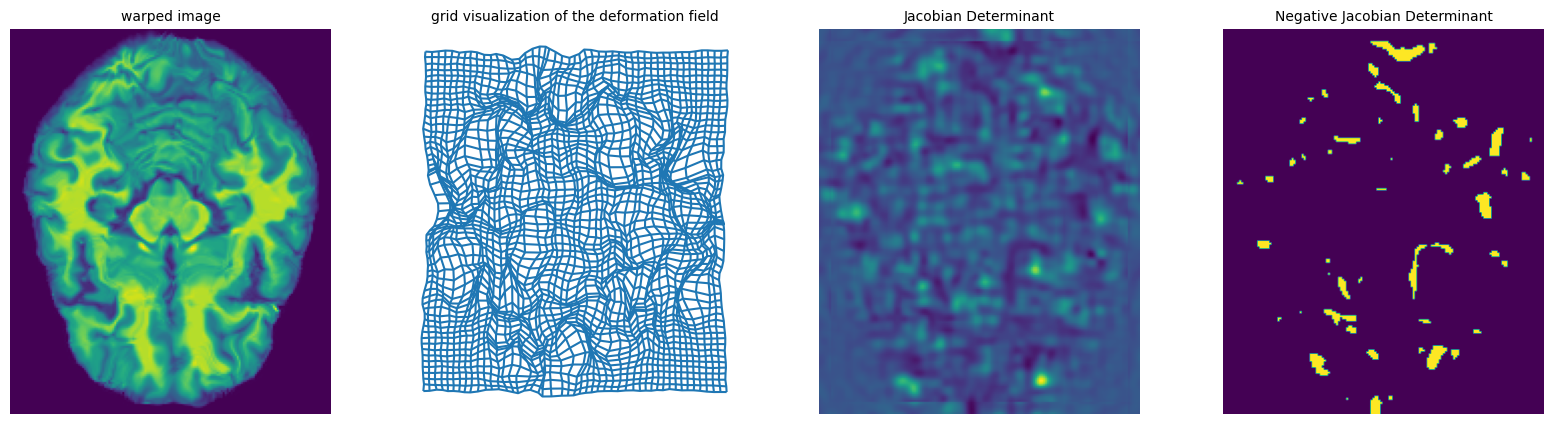

In [17]:
# plot for the best df with grid
best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)

plot_df(best_df_with_grid)

## None

In [18]:
_weight_J_det = weight_J_det.default
_kernel = kernel.default
weight_J_det.default = 0
config = parser.parse_args("")


best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)


weight_J_det.default = _weight_J_det
kernel.default = _kernel


(192, 160)
Iteration: 10 Loss_sim: -3.534e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: -4.371e-01 loss_J: 0.000e+00
Iteration: 30 Loss_sim: -4.718e-01 loss_J: 0.000e+00
Iteration: 40 Loss_sim: -5.028e-01 loss_J: 0.000e+00
Iteration: 50 Loss_sim: -5.242e-01 loss_J: 0.000e+00
Iteration: 60 Loss_sim: -5.312e-01 loss_J: 0.000e+00
Iteration: 70 Loss_sim: -5.502e-01 loss_J: 0.000e+00
Iteration: 80 Loss_sim: -5.521e-01 loss_J: 0.000e+00
Iteration: 90 Loss_sim: -5.550e-01 loss_J: 0.000e+00
Iteration: 100 Loss_sim: -5.683e-01 loss_J: 0.000e+00
Iteration: 110 Loss_sim: -5.788e-01 loss_J: 0.000e+00
Iteration: 120 Loss_sim: -5.853e-01 loss_J: 0.000e+00
Iteration: 130 Loss_sim: -5.905e-01 loss_J: 0.000e+00
Iteration: 140 Loss_sim: -5.928e-01 loss_J: 0.000e+00
Iteration: 150 Loss_sim: -6.015e-01 loss_J: 0.000e+00
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best 

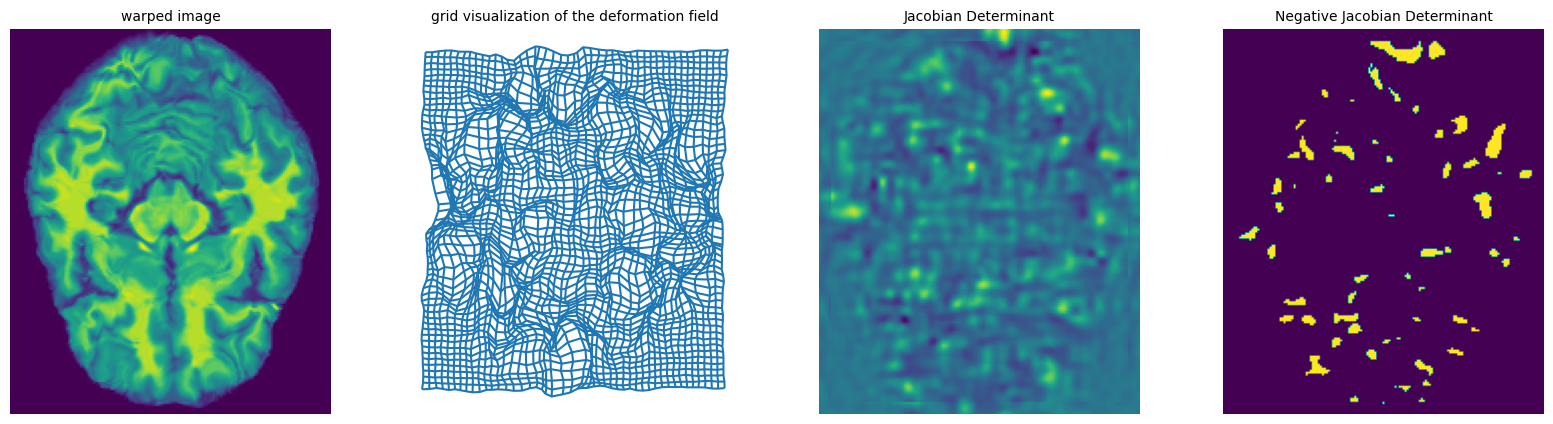

In [19]:
# plot for the best df with grid
best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)

plot_df(best_df_with_grid)

In [20]:
_weight_J_det = weight_J_det.default
_weight_df = weight_df.default
_weight_v = weight_v.default
_kernel = kernel.default
weight_J_det.default = 0
weight_df.default = 0
weight_v.default = 0

config = parser.parse_args("")


best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)


weight_J_det.default = _weight_J_det
kernel.default = _kernel
weight_df.default = _weight_df
weight_v.default = _weight_v

(192, 160)
Iteration: 10 Loss_sim: -2.787e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: -3.653e-01 loss_J: 0.000e+00
Iteration: 30 Loss_sim: -4.365e-01 loss_J: 0.000e+00
Iteration: 40 Loss_sim: -4.713e-01 loss_J: 0.000e+00
Iteration: 50 Loss_sim: -4.950e-01 loss_J: 0.000e+00
Iteration: 60 Loss_sim: -5.122e-01 loss_J: 0.000e+00
Iteration: 70 Loss_sim: -5.070e-01 loss_J: 0.000e+00
Iteration: 80 Loss_sim: -5.296e-01 loss_J: 0.000e+00
Iteration: 90 Loss_sim: -5.410e-01 loss_J: 0.000e+00
Iteration: 100 Loss_sim: -5.488e-01 loss_J: 0.000e+00
Iteration: 110 Loss_sim: -5.557e-01 loss_J: 0.000e+00
Iteration: 120 Loss_sim: -5.621e-01 loss_J: 0.000e+00
Iteration: 130 Loss_sim: -5.670e-01 loss_J: 0.000e+00
Iteration: 140 Loss_sim: -5.664e-01 loss_J: 0.000e+00
Iteration: 150 Loss_sim: -5.767e-01 loss_J: 0.000e+00
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best 

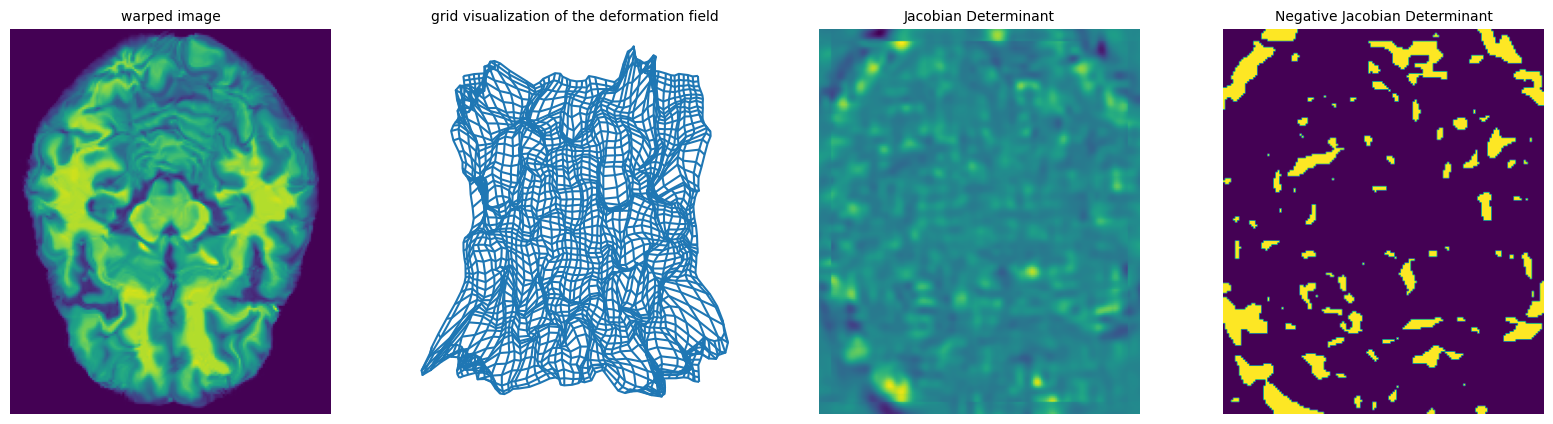

In [21]:
# plot for the best df with grid
best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)

plot_df(best_df_with_grid)

# test

### grid vis

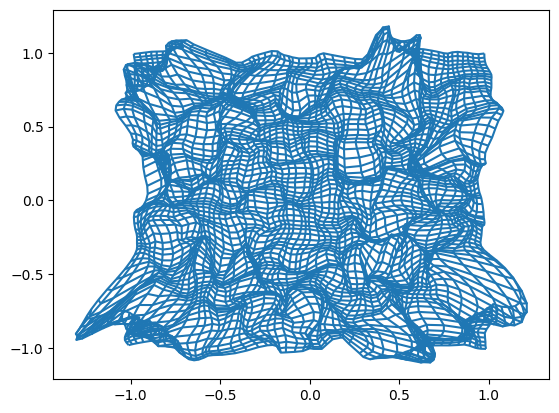

In [22]:
fig, ax = plt.subplots()
# resize the grid
img0 = best_df_with_grid[0,:,:,0]
img1 = best_df_with_grid[0,:,:,1]
# resize img0 and img1
# resize to a smaller size
resize_factor = 0.4
img0 = cv2.resize(img0, (int(img0.shape[0]*resize_factor), int(img0.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
img1 = cv2.resize(img1, (int(img1.shape[0]*resize_factor), int(img1.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
# plot_grid(best_df_with_grid[0,:,:,1], best_df_with_grid[0,:,:,0], ax=ax, color="C0")
plot_grid(img1, img0, ax=ax, color="C0")
plt.show()

### Plot for J_det

In [23]:
# import pystrum.pynd.ndutils as nd

J_det = JacboianDet_2D(best_df_with_grid)

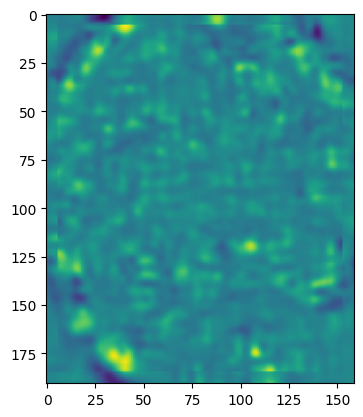

In [24]:
plt.imshow(J_det[0,:,:])

### Plot for Neg

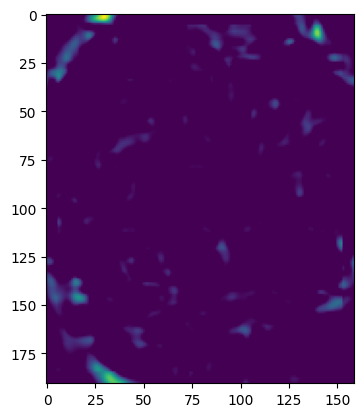

In [25]:
# clip the positive value of J_det to 0
J_neg = -torch.clip(J_det, max=0)
# convert to numpy
J_neg = J_neg.detach().cpu().numpy()
plt.imshow(J_neg[0,:,:])

In [26]:
J_det.shape

torch.Size([1, 191, 159])